### import labraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Load dataset

In [7]:
data = pd.read_csv("Dataset.csv")

In [18]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3748,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,591
2,6300002,2896,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,0,4,4.8,0,1,229


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   int32  
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   int32  
 4   Address               9551 non-null   int32  
 5   Locality              9551 non-null   int32  
 6   Locality Verbose      9551 non-null   int32  
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   int32  
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   int32  
 12  Has Table booking     9551 non-null   int32  
 13  Has Online delivery   9551 non-null   int32  
 14  Is delivering now     9551 non-null   int32  
 15  Switch to order menu 

### Handle missing values

In [13]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
data.fillna(method='ffill', inplace=True) # Forward fill for simplicity

### Encode categorical variables

In [17]:
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col].astype(str))

### Check available columns

In [24]:
print("Columns:", data.columns)

Columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


### Use correct column name (adjust if needed)

In [25]:
target_column = "Aggregate rating"   # change if your CSV uses "AggregateRating"
X = data.drop(target_column, axis=1)
y = data[target_column]


### Train-test split data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [30]:
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (7640, 20)
Test set shape: (1911, 20)


### LinearRegression models

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### DecisionTree models

In [32]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=6)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

### Evaluate Models

In [34]:
models = {"Linear Regression": lin_reg, "Decision Tree": tree_reg}
for name, model in models.items():
    y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{name} → MSE: {mse:.3f}, R²: {r2:.3f}")

Decision Tree → MSE: 0.029, R²: 0.987


### Feature Importance (Decision Tree)

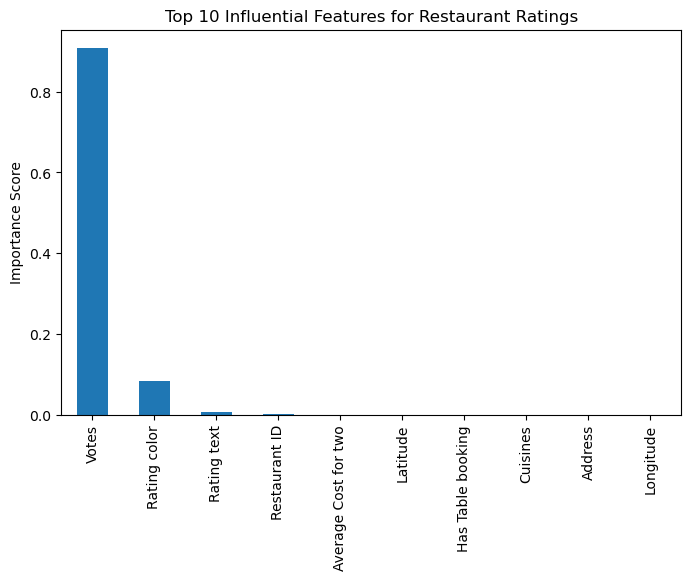

In [37]:
feat_importances = pd.Series(tree_reg.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize=(8,5))
feat_importances.head(10).plot(kind='bar')
plt.title("Top 10 Influential Features for Restaurant Ratings")
plt.ylabel("Importance Score")
plt.show()